In [41]:
#-*- coding : utf-8-*-
# coding:unicode_escape
import pandas as pd
import numpy as np

data = pd.read_csv(r'D:\Crawler\51job\管理-月.csv', encoding='gb18030')

In [42]:
data.head()

,职位名称,薪酬,城市地区,工作经验要求,学历要求,公司福利,公司名称,公司标签,地区,*n薪,薪酬_n,月薪最小值,月薪最大值,平均月薪,公司规模,公司类型
0,商场楼管/楼层管理,3-5千,孝感,1年,大专,五险一金\n员工旅游\n专业培训\n绩效奖金\n餐饮补贴\n运营\n管理\n商场管理\n楼层...,湖北涢都置业有限公司,物业管理/商业中心,孝感,NaN,3000-5000,3000,5000,4000,150-500人,民营
1,管理培训生（南通）,5-6千·13薪,南通·崇川区,1年,本科,提供工作餐\n五险一金\n做五休二\n带薪年假\n节日福利\n年底双薪\n免费工作餐\n补充...,麦德龙商业集团有限公司（东2东3区）,批发/零售,南通,13.0,5000-6000,5000,6000,5500,500-1000人,外资（欧美）
2,管培生/管理实习生（五险一金+晋升+包住）,3.5-7千,兰州·城关区,无需经验,大专,储备干部\n管培生\n管理\n实习生\n绩效奖金\n提供住宿\n五险一金\n节日福利\n专业...,兰州美烁信息科技有限公司,批发/零售,兰州,NaN,3500-7000,3500,7000,5250,少于50人,民营
3,高级运营管理师,1-1.5万·15薪,芜湖,5-7年,本科,管理\n运营管理\n企业管理\n经营管理\n经营计划\n五险一金\n补充医疗保险\n餐饮补贴...,奇瑞新能源汽车股份有限公司,新能源,芜湖,15.0,10000-15000,10000,15000,12500,1000-5000人,国企
4,会员管理主管/专员,3-6千,南昌·新建区,1年,大专,五险一金\n包吃\n免费班车\n节日福利\n绩效奖金\n会员管理\n医药\n客诉\n社区,江西洪兴大药房连锁有限公司,医疗/护理/卫生,南昌,NaN,3000-6000,3000,6000,4500,1000-5000人,民营


In [43]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

# 假设您已经有一个包含特征和标签的数据集，可以使用以下代码导入数据：

X = data[['地区', '工作经验要求', '学历要求', '公司规模', '公司类型', '公司标签']]
y = data['平均月薪']
# 对于分类特征，需要进行独热编码。
X = pd.get_dummies(X, columns=['地区', '工作经验要求', '学历要求', '公司规模', '公司类型', '公司标签'])

In [44]:
y

0       4000
1       5500
2       5250
3      12500
4       4500
       ...  
604    12500
605     4500
606     5000
607     9000
608     5000
Name: 平均月薪, Length: 609, dtype: int64

In [48]:
data1 = pd.concat([X,y],axis=1)
data1

,地区_三亚,地区_上海,地区_东莞,地区_中山,地区_云浮,地区_佛山,地区_保定,地区_兰州,地区_北京,地区_十堰,...,公司标签_计算机服务(系统、数据服务、维修),公司标签_计算机软件,公司标签_贸易/进出口,公司标签_通信/电信/网络设备,公司标签_酒店/旅游,公司标签_金融/投资/证券,公司标签_银行,公司标签_非营利组织,公司标签_餐饮业,平均月薪
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5500
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5250
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12500
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12500
605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4500
606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5000
607,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9000


In [49]:
from sklearn.ensemble import RandomForestRegressor

# 创建一个随机森林回归模型，并拟合数据。
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 计算各特征的重要性。
feature_importance = model.feature_importances_


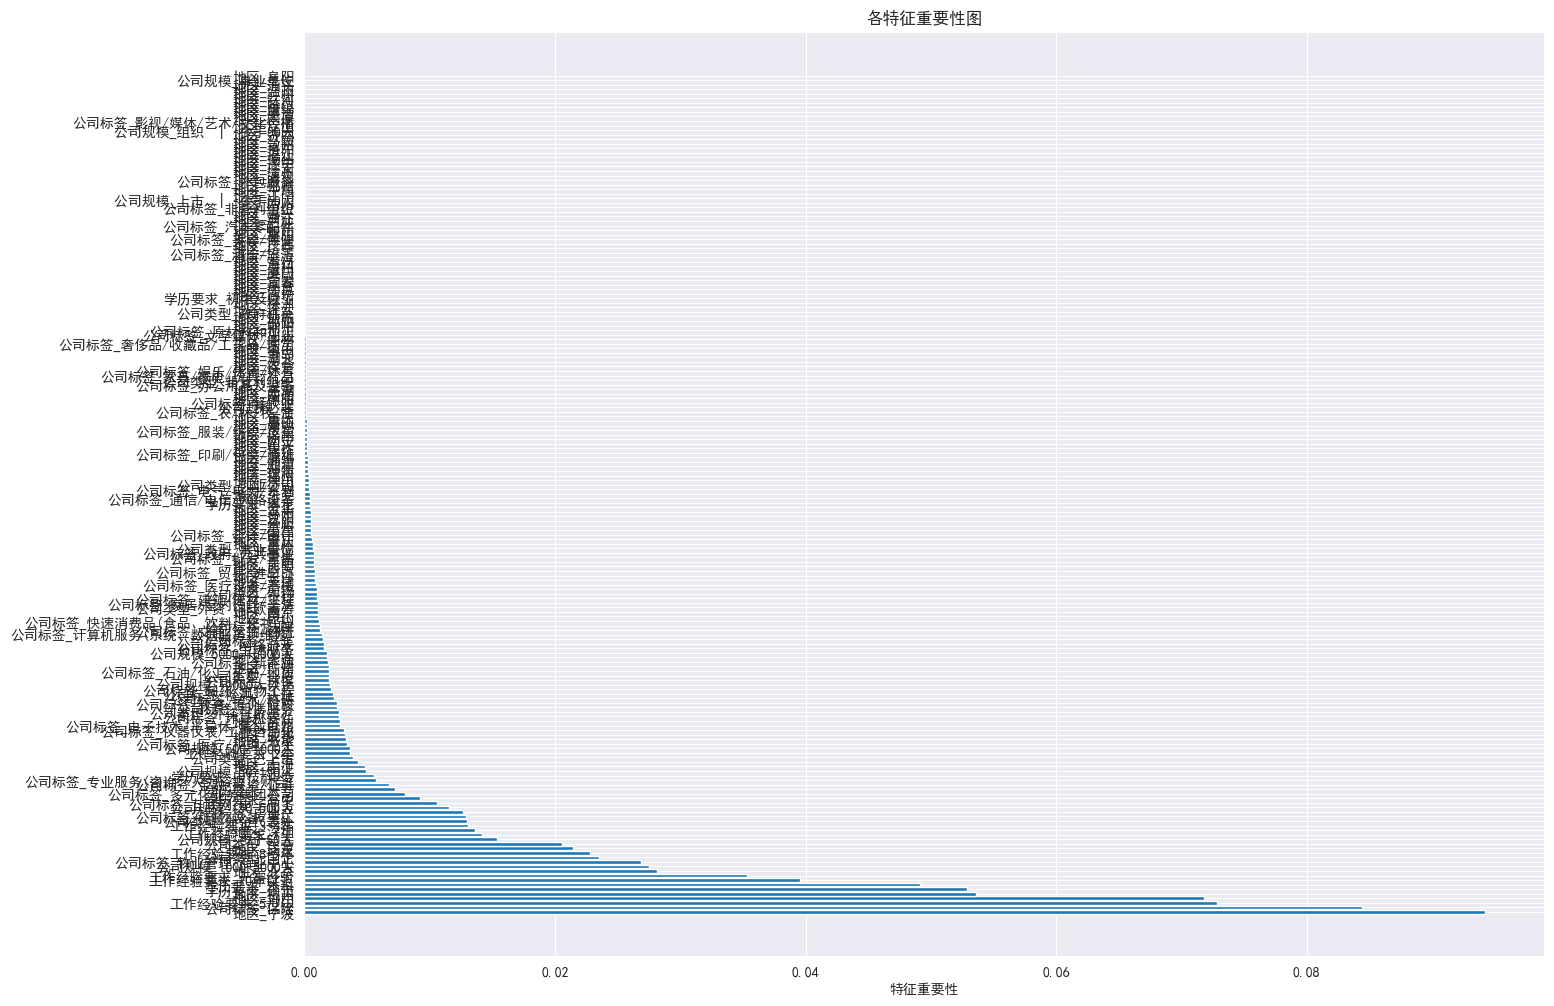

In [52]:

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文
# 将各特征的重要性按照从大到小的顺序排列。
sorted_idx = feature_importance.argsort()[::-1]
pos = np.arange(sorted_idx.shape[0]) + 0.5

# 画出特征重要性柱状图。
plt.figure(figsize=(16, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('特征重要性')
plt.title('各特征重要性图')
plt.show()


In [53]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X, y)

# 使用export_graphviz函数将决策树导出为DOT格式。
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=['薪酬'],
                           filled=True, rounded=True,
                           special_characters=True)

# 使用graphviz库将DOT格式转换为可视化图形。
graph = graphviz.Source(dot_data)
graph.render(filename='salary_tree', format='png', cleanup=True)

# 在Jupyter Notebook中直接显示图形。
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [72]:
from scipy import stats

y = stats.boxcox(y)[0]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # fit_transform for train data
X_test = ss.transform(X_test)

In [75]:
y_train

array([1.69424176, 1.69040152, 1.69390829, 1.69282775, 1.69191679,
       1.68853375, 1.69225047, 1.68790967, 1.69113016, 1.69066043,
       1.69113016, 1.69113016, 1.69491639, 1.69618102, 1.68740811,
       1.69012409, 1.69424176, 1.69331133, 1.69453538, 1.69012409,
       1.69331133, 1.69584418, 1.69282775, 1.68982589, 1.69282775,
       1.69331133, 1.69424176, 1.69282775, 1.69513839, 1.69066043,
       1.69113016, 1.69113016, 1.68790967, 1.695433  , 1.69113016,
       1.69424176, 1.6925526 , 1.69012409, 1.68877737, 1.69282775,
       1.69012409, 1.69390829, 1.69453538, 1.69331133, 1.69154579,
       1.69154579, 1.69012409, 1.68982589, 1.6896359 , 1.69066043,
       1.69390829, 1.68950424, 1.69154579, 1.68982589, 1.69307965,
       1.69282775, 1.69154579, 1.6925526 , 1.69113016, 1.69012409,
       1.69113016, 1.6925526 , 1.68950424, 1.69154579, 1.69040152,
       1.68950424, 1.68950424, 1.69424176, 1.69090276, 1.68982589,
       1.68982589, 1.69012409, 1.69191679, 1.68685047, 1.69173

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),MLPRegressor(alpha=20),DecisionTreeRegressor(),ExtraTreeRegressor(),XGBRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','XGBoost','RandomForest','AdaBoost','GradientBoost','Bagging']
score_=[]

In [77]:
for name,model in zip(models_str,models):
    # print('开始训练模型：'+name)
    model=model   #建立模型
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=model.score(X_test,y_test)
    score_.append(str(score)[:5])
    print(name +' 得分:'+str(score))

LinearRegression 得分:-2.179795103491534e+26
KNNRegressor 得分:0.028964396065868203
SVR 得分:-0.0320824401658657
Ridge 得分:0.23964572782393956
Lasso 得分:-0.03323912853926636


D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor 得分:-83.04485061531895
DecisionTree 得分:0.21419482043893734
ExtraTree 得分:0.21225308350004612
[21:37:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost 得分:0.3806599882196673
RandomForest 得分:0.35428610358302703
AdaBoost 得分:0.19933660951533694
GradientBoost 得分:0.3903592004270896
Bagging 得分:0.33553404514216967


In [59]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.neural_network import MLPClassifier


models=[KNeighborsClassifier(),SVC(),MLPClassifier(alpha=20)]
models_str=['KNNRegressor','SVR','MLPRegressor']
score_=[]

In [60]:
for name,model in zip(models_str,models):
    # print('开始训练模型：'+name)
    model=model   #建立模型
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=model.score(X_test,y_test)
    score_.append(str(score)[:5])
    print(name +' 得分:'+str(score))

KNNRegressor 得分:0.10655737704918032
SVR 得分:0.09836065573770492
MLPRegressor 得分:0.040983606557377046


D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
